In [202]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import zipfile
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##  Dataset: https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients#column_3C_weka.csv

In [203]:
zf = zipfile.ZipFile('biomechanical-features-of-orthopedic-patients.zip')
patients = pd.read_csv(zf.open('column_3C_weka.csv'))
patients.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [204]:
patients.shape

(310, 7)

## 1.	Create a statistical summary of the data set.

In [205]:
patients.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [206]:
patients.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [207]:
for col in patients.columns:
    print('Unique enteries for ' + col + ' are :\n') 
    print(patients[col].unique(),'\n')

Unique enteries for pelvic_incidence are :

[ 63.0278175   39.05695098  68.83202098  69.29700807  49.71285934
  40.25019968  53.43292815  45.36675362  43.79019026  36.68635286
  49.70660953  31.23238734  48.91555137  53.5721702   57.30022656
  44.31890674  63.83498162  31.27601184  38.69791243  41.72996308
  43.92283983  54.91944259  63.07361096  45.54078988  36.12568347
  54.12492019  26.14792141  43.58096394  44.5510115   66.87921138
  50.81926781  46.39026008  44.93667457  38.66325708  59.59554032
  31.48421834  32.09098679  35.70345781  55.84328595  52.41938511
  35.49244617  46.44207842  53.85479842  66.28539377  56.03021778
  50.91244034  48.332638    41.35250407  40.55735663  41.76773173
  55.28585178  74.43359316  50.20966979  30.14993632  41.17167989
  47.65772963  43.34960621  46.85578065  43.20318499  48.10923638
  74.37767772  89.68056731  44.529051    77.69057712  76.1472121
  83.93300857  78.49173027  75.64973136  72.07627839  58.59952852
  72.56070163  86.90079431  84.97

In [208]:
for col in patients.columns.drop('class'):
    print('Range for ' + col + ' is: ', (patients[col].min(),patients[col].max()), '\n') 

Range for pelvic_incidence is:  (26.14792141, 129.8340406) 

Range for pelvic_tilt is:  (-6.554948347000001, 49.4318636) 

Range for lumbar_lordosis_angle is:  (14.0, 125.7423855) 

Range for sacral_slope is:  (13.3669307, 121.42956559999999) 

Range for pelvic_radius is:  (70.08257486, 163.0710405) 

Range for degree_spondylolisthesis is:  (-11.05817866, 418.54308210000005) 



## 2.	Create an appropriate histogram for each of the features you consider relevant.

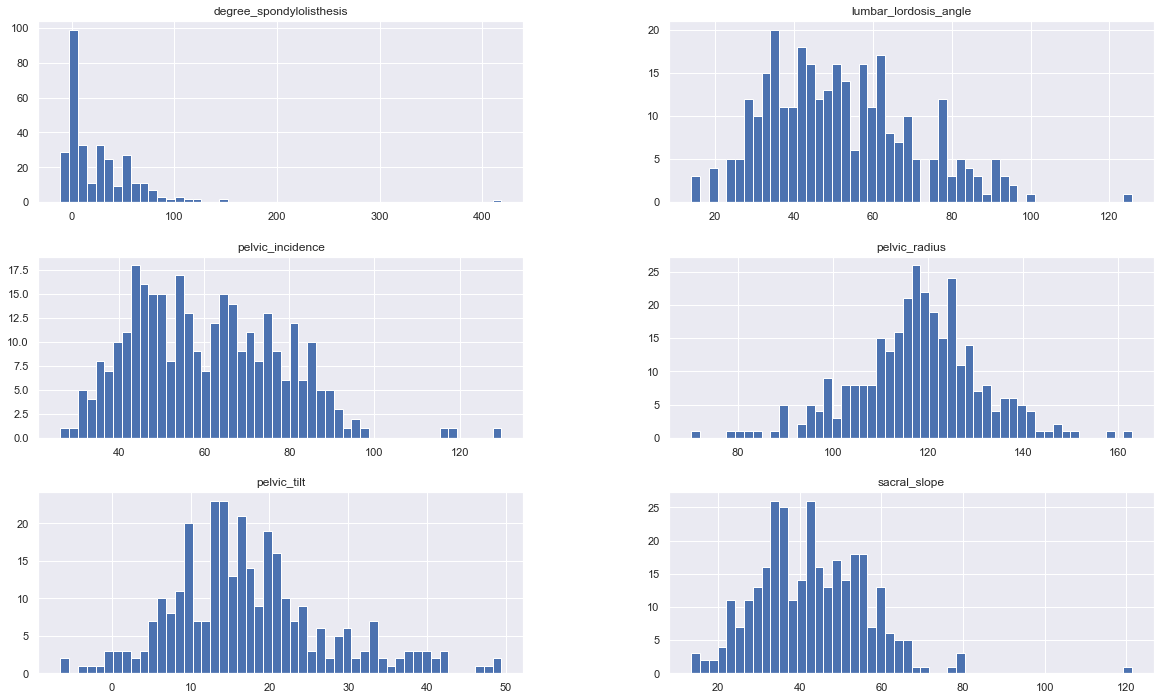

In [209]:
%matplotlib inline
patients.hist(bins=50,figsize=(20,12))
plt.show()

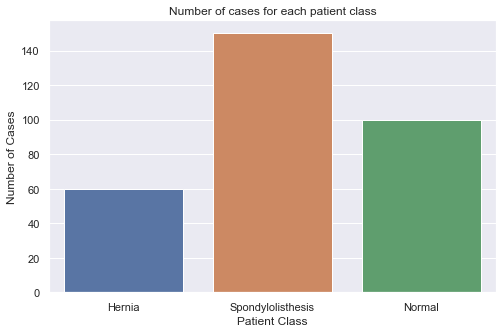

In [210]:
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(patients['class'])
ax.set_xlabel('Patient Class')
ax.set_ylabel('Number of Cases')
ax.set_title('Number of cases for each patient class')
plt.show()

Text(0.5, 1.0, 'Number of spondylolisthesis cases vs degree of spondylolisthesis')

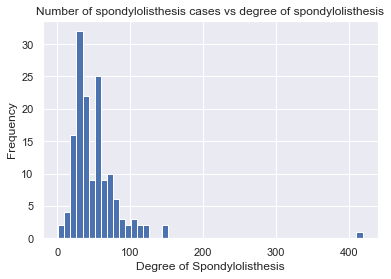

In [211]:
ax = patients[patients['class']=='Spondylolisthesis']['degree_spondylolisthesis'].hist(bins=50)
ax.set_xlabel('Degree of Spondylolisthesis')
ax.set_ylabel('Frequency')
ax.set_title('Number of spondylolisthesis cases vs degree of spondylolisthesis')

Text(0.5, 1.0, 'Number of spondylolisthesis cases vs pelvic incidence')

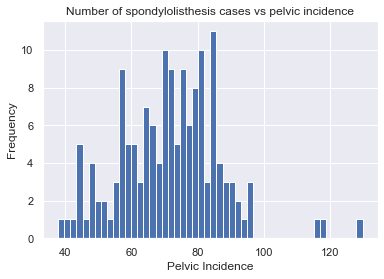

In [212]:
ax = patients[patients['class']=='Spondylolisthesis']['pelvic_incidence'].hist(bins=50)
ax.set_xlabel('Pelvic Incidence')
ax.set_ylabel('Frequency')
ax.set_title('Number of spondylolisthesis cases vs pelvic incidence')

Text(0.5, 1.0, 'Number of spondylolisthesis cases vs pelvic radius')

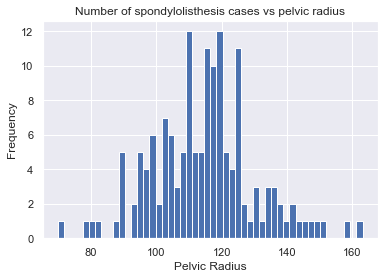

In [213]:
ax = patients[patients['class']=='Spondylolisthesis']['pelvic_radius'].hist(bins=50)
ax.set_xlabel('Pelvic Radius')
ax.set_ylabel('Frequency')
ax.set_title('Number of spondylolisthesis cases vs pelvic radius')

Text(0.5, 1.0, 'Number of hernia cases vs sacral slope')

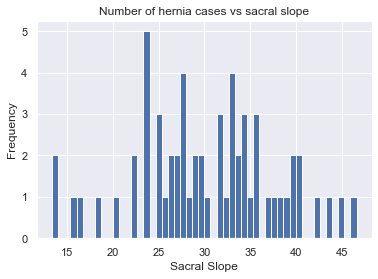

In [214]:
ax = patients[patients['class']=='Hernia']['sacral_slope'].hist(bins=50)
ax.set_xlabel('Sacral Slope')
ax.set_ylabel('Frequency')
ax.set_title('Number of hernia cases vs sacral slope')

Text(0.5, 1.0, 'Number of hernia cases vs pelvic radius')

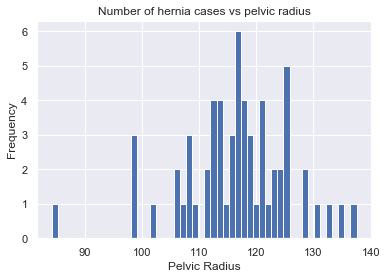

In [215]:
ax = patients[patients['class']=='Hernia']['pelvic_radius'].hist(bins=50)
ax.set_xlabel('Pelvic Radius')
ax.set_ylabel('Frequency')
ax.set_title('Number of hernia cases vs pelvic radius')

Text(0.5, 1.0, 'Number of hernia cases vs sacral slope')

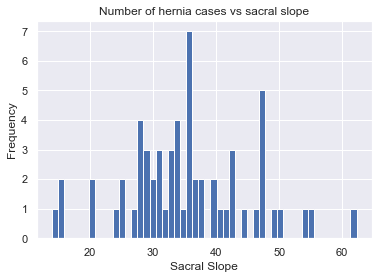

In [216]:
ax = patients[patients['class']=='Hernia']['lumbar_lordosis_angle'].hist(bins=50)
ax.set_xlabel('Sacral Slope')
ax.set_ylabel('Frequency')
ax.set_title('Number of hernia cases vs sacral slope')

(6.0, 0.0)

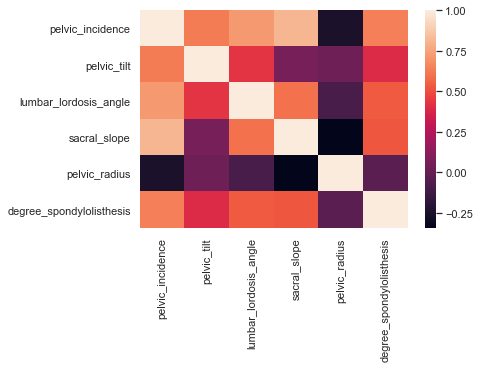

In [217]:
corr_matrix = patients.corr()
sns.set()
ax = sns.heatmap(corr_matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [218]:
patients.drop(['pelvic_tilt'], axis=1, inplace=True)

## 3.	Analyze the data using SVM, DT, and RF. 
## Which one of these three methods give the best result? 
## What are the best parameters for each algorithm?

In [219]:
le = LabelEncoder()
patients['class'] = le.fit_transform(patients['class']) 

In [220]:
le.classes_

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [221]:
train_set, test_set = train_test_split(patients, test_size = 0.2, random_state = 42)

In [222]:
scaler = StandardScaler()
X_train =  scaler.fit_transform(train_set.drop('class', axis = 1))

In [223]:
y_train = train_set['class'].copy()

In [224]:
X_test =  scaler.fit_transform(test_set.drop('class', axis = 1))

In [225]:
y_test = test_set['class'].copy()

## Model 1: Support Vector Classification (SVC)

In [226]:
from sklearn.svm import SVC 

param_grid_svm = {'C': [0.1, 1, 10],  'gamma': [1, 0.1, 0.01]}

svm_Linear = SVC(kernel='linear', coef0=1)

grid_search_svm = GridSearchCV(svm_Linear , param_grid = param_grid_svm, cv=5, scoring = 'accuracy',return_train_score=True)

grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [227]:
print(grid_search_svm.best_params_)

{'C': 1, 'gamma': 1}


In [228]:
print('Best training accuracy score for SVC is: ', grid_search_svm.cv_results_['mean_train_score'][grid_search_svm.best_index_])

Best training accuracy score for SVC is:  0.8820873711736656


In [229]:
y_predict_svm = grid_search_svm.predict(X_test)

In [230]:
print('Predictions:', le.inverse_transform(y_predict_svm[:5]))

Predictions: ['Normal' 'Hernia' 'Normal' 'Spondylolisthesis' 'Hernia']


In [231]:
print('Labels:', le.inverse_transform(y_test.iloc[:5]))

Labels: ['Normal' 'Hernia' 'Hernia' 'Spondylolisthesis' 'Hernia']


In [232]:
cm_svm = confusion_matrix(y_test,y_predict_svm)
                          
print(confusion_matrix(y_test,y_predict_svm))

[[ 6  6  0]
 [ 4 14  0]
 [ 0  0 32]]


(3.0, 0.0)

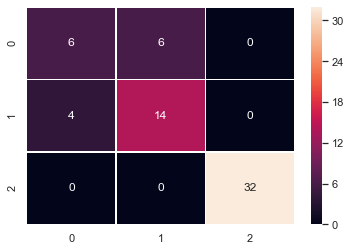

In [233]:
sns.set()
ax=sns.heatmap(cm_svm, annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [234]:
print(classification_report(y_test,y_predict_svm,target_names = ['Hernia', 'Normal', 'Spondylolisthesis']))

                   precision    recall  f1-score   support

           Hernia       0.60      0.50      0.55        12
           Normal       0.70      0.78      0.74        18
Spondylolisthesis       1.00      1.00      1.00        32

         accuracy                           0.84        62
        macro avg       0.77      0.76      0.76        62
     weighted avg       0.84      0.84      0.84        62



In [235]:
score_svm = round(accuracy_score(y_test, y_predict_svm, normalize=True),4)
print('Testing Accuracy Score for SVM is:', score_svm)

Testing Accuracy Score for SVM is: 0.8387


In [236]:
scores_svm = cross_val_score(grid_search_svm,X_train,y_train,scoring='accuracy',cv=5)
error_svm = [round(1-x,4) for x in scores_svm]

In [237]:
error_svm

[0.1569, 0.1176, 0.22, 0.1042, 0.125]

## Model 2: Decision Tree

In [238]:
from sklearn.tree import DecisionTreeClassifier 

param_grid_dt = {'min_samples_leaf': [3, 6, 8], 'min_samples_split': [2, 3, 4]}

dt = DecisionTreeClassifier(random_state= 42)

grid_search_dt = GridSearchCV(dt , param_grid = param_grid_dt, cv=5, scoring = 'accuracy',return_train_score=True)

grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': [3, 6, 8],
                         'min_samples_split': [2, 3, 4]},
             pre_dispatc

In [239]:
print(grid_search_dt.best_params_)

{'min_samples_leaf': 6, 'min_samples_split': 2}


In [240]:
print(grid_search_dt.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [241]:
print('Best training accuracy score for Decision Tree is: ', grid_search_dt.cv_results_['mean_train_score'][grid_search_dt.best_index_])

Best training accuracy score for Decision Tree is:  0.9011431574629544


In [242]:
y_predict_dt = grid_search_dt.predict(X_test)

In [243]:
print('Predictions:', le.inverse_transform(y_predict_dt[:5]))

Predictions: ['Normal' 'Hernia' 'Normal' 'Spondylolisthesis' 'Normal']


In [244]:
print('Labels:', le.inverse_transform(y_test.iloc[:5]))

Labels: ['Normal' 'Hernia' 'Hernia' 'Spondylolisthesis' 'Hernia']


In [245]:
cm_dt = confusion_matrix(y_test,y_predict_dt)

print(confusion_matrix(y_test,y_predict_dt))

[[ 5  7  0]
 [ 3 15  0]
 [ 0  0 32]]


(3.0, 0.0)

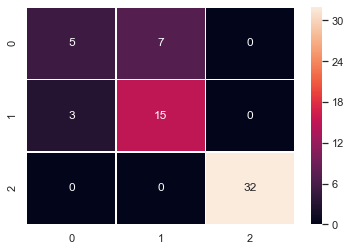

In [246]:
sns.set()
ax=sns.heatmap(cm_dt, annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [247]:
print(classification_report(y_test,y_predict_dt,target_names = ['Hernia', 'Normal', 'Spondylolisthesis']))

                   precision    recall  f1-score   support

           Hernia       0.62      0.42      0.50        12
           Normal       0.68      0.83      0.75        18
Spondylolisthesis       1.00      1.00      1.00        32

         accuracy                           0.84        62
        macro avg       0.77      0.75      0.75        62
     weighted avg       0.84      0.84      0.83        62



In [248]:
score_dt = round(accuracy_score(y_test, y_predict_dt, normalize=True),4)
print('Testing Accuracy Score for Decision Tree is:', score_dt)

Testing Accuracy Score for Decision Tree is: 0.8387


In [249]:
scores_dt = cross_val_score(grid_search_dt,X_train,y_train,scoring='accuracy',cv=5)
error_dt = [round(1-x,4) for x in scores_dt]

In [250]:
error_dt

[0.2157, 0.1765, 0.24, 0.2083, 0.2083]

## Model 3: Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'max_leaf_nodes': [5, 20, 30], 'n_estimators': [200, 300, 500]}

rf = RandomForestClassifier(n_jobs = -1, random_state= 42)

grid_search_rf = GridSearchCV(rf , param_grid = param_grid_rf, cv=2, scoring = 'accuracy',return_train_score=True)

grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'ma

In [252]:
print(grid_search_rf.best_params_)

{'max_leaf_nodes': 20, 'n_estimators': 300}


In [253]:
print(grid_search_rf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [254]:
print('Best training accuracy score for Random Forest is: ', grid_search_rf.cv_results_['mean_train_score'][grid_search_rf.best_index_])

Best training accuracy score for Random Forest is:  1.0


In [255]:
y_predict_rf = grid_search_rf.predict(X_test)

In [256]:
print('Predictions:', le.inverse_transform(y_predict_rf[:5]))

Predictions: ['Normal' 'Hernia' 'Normal' 'Spondylolisthesis' 'Normal']


In [257]:
print('Labels:', le.inverse_transform(y_test.iloc[:5]))

Labels: ['Normal' 'Hernia' 'Hernia' 'Spondylolisthesis' 'Hernia']


In [258]:
cm_rf = confusion_matrix(y_test,y_predict_rf)

print(confusion_matrix(y_test,y_predict_rf))

[[ 2 10  0]
 [ 3 15  0]
 [ 0  0 32]]


(3.0, 0.0)

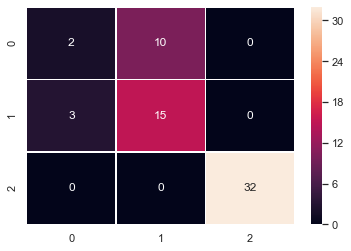

In [259]:
sns.set()
ax=sns.heatmap(cm_rf, annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [260]:
print(classification_report(y_test,y_predict_rf,target_names = ['Hernia', 'Normal', 'Spondylolisthesis']))

                   precision    recall  f1-score   support

           Hernia       0.40      0.17      0.24        12
           Normal       0.60      0.83      0.70        18
Spondylolisthesis       1.00      1.00      1.00        32

         accuracy                           0.79        62
        macro avg       0.67      0.67      0.64        62
     weighted avg       0.77      0.79      0.76        62



In [261]:
score_rf = round(accuracy_score(y_test, y_predict_rf, normalize=True),4)
print('Testing Accuracy Score for Random Forest is:', score_rf)

Testing Accuracy Score for Random Forest is: 0.7903


In [262]:
scores_rf = cross_val_score(grid_search_rf,X_train,y_train,scoring='accuracy',cv=5)
error_rf = [round(1-x,4) for x in scores_rf]

In [263]:
error_rf

[0.1569, 0.1373, 0.18, 0.1667, 0.2083]

## 4.	Perform a sensitivity analysis on the effects of training % vs. testing % for the best parameters obtained per each method.

In [264]:
size_list = []
accuracy_svm = []
accuracy_dt = []
accuracy_rf = []

for size in np.linspace(0.1, 0.9, 9):
    size_list.append(size)
    train_set, test_set = train_test_split(patients, test_size = size, random_state = 42)
    X_train =  scaler.fit_transform(train_set.drop('class', axis = 1))
    y_train = train_set['class'].copy()
    X_test =  scaler.fit_transform(test_set.drop('class', axis = 1))
    y_test = test_set['class'].copy()
   
    grid_search_svm.fit(X_train, y_train)
    y_predict = grid_search_svm.predict(X_test)
    cm = confusion_matrix(y_test,y_predict)
    accuracy_svm.append(round(accuracy_score(y_test, y_predict, normalize=True),4)) 
    
    grid_search_dt.fit(X_train, y_train)
    y_predict = grid_search_dt.predict(X_test)
    cm = confusion_matrix(y_test,y_predict)
    accuracy_dt.append(round(accuracy_score(y_test, y_predict, normalize=True),4))
    
    grid_search_rf.fit(X_train, y_train)
    y_predict = grid_search_rf.predict(X_test)
    cm = confusion_matrix(y_test,y_predict)
    accuracy_rf.append(round(accuracy_score(y_test, y_predict, normalize=True),4))
    
Sen_Analysis = pd.DataFrame()
Sen_Analysis['Test Size'] = size_list
Sen_Analysis['SVM Accuracy'] = accuracy_svm
Sen_Analysis['DT Accuracy'] = accuracy_dt
Sen_Analysis['RF Accuracy'] = accuracy_rf
Sen_Analysis

,Test Size,SVM Accuracy,DT Accuracy,RF Accuracy
0,0.1,0.8387,0.8710,0.7419
1,0.2,0.8387,0.8387,0.7903
2,0.3,0.8191,0.7979,0.7979
3,0.4,0.8548,0.7661,0.8387
4,0.5,0.8774,0.8065,0.8710
5,0.6,0.8387,0.8065,0.8441
6,0.7,0.8440,0.7294,0.7890
7,0.8,0.8306,0.7500,0.7823
8,0.9,0.7849,0.7742,0.7993


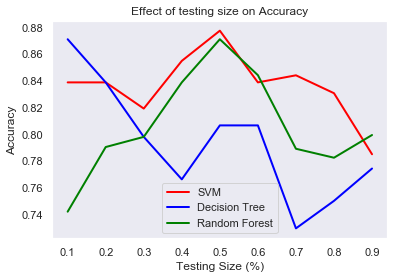

In [265]:
plt.plot(size_list, accuracy_svm, color = 'red', label = 'SVM', linewidth = 2)
plt.plot(size_list, accuracy_dt, color = 'blue', label = 'Decision Tree', linewidth = 2)
plt.plot(size_list, accuracy_rf, color = 'green', label = 'Random Forest', linewidth = 2)
plt.title('Effect of testing size on Accuracy')
plt.xlabel('Testing Size (%)')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

## 5.	Create a boxplot comparing the error from the three ML Algorithms you tested.

In [266]:
prediction_errors = [error_svm, error_dt, error_rf]

[Text(0, 0, 'SVC'), Text(0, 0, 'Decision Tree'), Text(0, 0, 'Random Forest')]

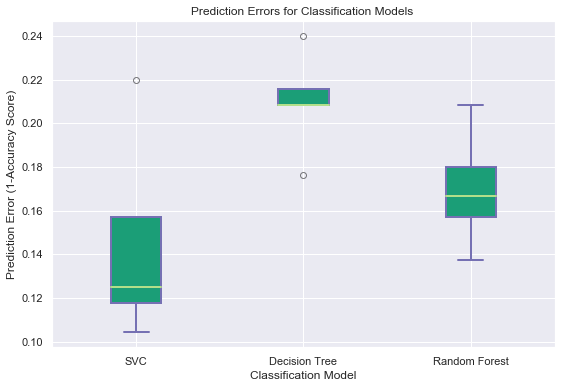

In [267]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(prediction_errors, patch_artist=True)

for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.title('Prediction Errors for Classification Models ')
plt.ylabel('Prediction Error (1-Accuracy Score)')
plt.xlabel('Classification Model')
ax.set_xticklabels(['SVC', 'Decision Tree', 'Random Forest'])

## 6.	Make a summary results table showing the accuracy score, confusion matrix, and classification report for the methods compared.

In [268]:
results = {'Models': ['Support Vector Classification', 'Decision Tree', 'Random Forest'],
          'Accuracy Scores': [score_svm, score_dt, score_rf]}

summary_results = pd.DataFrame(results)

summary_results

,Models,Accuracy Scores
0,Support Vector Classification,0.8387
1,Decision Tree,0.8387
2,Random Forest,0.7903


## Model Selected : SVC

## 7.	Randomly create 10 instances based on the features used in the model, and then use the model to predict the patient class.

In [273]:
random.seed(42)

instance = {'pelvic_incidence': np.random.randint(27, 129,10), 
                    'lumbar_lordosis_angle': np.random.randint(14, 125,10),
                    'sacral_slope': np.random.randint(14, 121,10),
                   'pelvic_radius': np.random.randint(71, 163,10),
                   'degree_spondylolisthesis': np.random.randint(-11, 418,10),
           'class': np.random.choice(['Hernia', 'Normal', 'Spondylolisthesis'], size=(10))}

random_instance = pd.DataFrame(instance)
random_instance

,pelvic_incidence,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,94,95,118,145,74,Spondylolisthesis
1,36,16,106,114,378,Spondylolisthesis
2,58,92,84,103,244,Spondylolisthesis
3,71,33,114,113,148,Normal
4,114,97,21,162,124,Spondylolisthesis
5,58,122,82,95,407,Spondylolisthesis
6,61,103,112,120,125,Spondylolisthesis
7,42,37,73,110,389,Spondylolisthesis
8,125,88,55,108,403,Normal
9,108,91,48,86,146,Normal


In [274]:
random_input = scaler.fit_transform(random_instance.drop('class', axis = 1))
random_input

array([[ 5.81792867e-01,  5.25375475e-01,  1.19182859e+00,
         1.37161722e+00, -1.31351304e+00],
       [-1.36872657e+00, -1.83284399e+00,  8.02129867e-01,
        -7.46458351e-02,  1.03812397e+00],
       [-6.28874370e-01,  4.35822837e-01,  8.76822122e-02,
        -5.87835951e-01,  1.54712961e-03],
       [-1.91688979e-01, -1.32537904e+00,  1.06192901e+00,
        -1.21299482e-01, -7.41075081e-01],
       [ 1.25438578e+00,  5.85077234e-01, -1.95823607e+00,
         2.16472922e+00, -9.26730634e-01],
       [-6.28874370e-01,  1.33134922e+00,  2.27324254e-02,
        -9.61065127e-01,  1.26245776e+00],
       [-5.27985434e-01,  7.64182509e-01,  9.96979228e-01,
         2.05276047e-01, -9.18994986e-01],
       [-1.16694870e+00, -1.20597552e+00, -2.69541615e-01,
        -2.61260423e-01,  1.12321609e+00],
       [ 1.62431188e+00,  3.16419320e-01, -8.54089697e-01,
        -3.54567717e-01,  1.23151517e+00],
       [ 1.05260790e+00,  4.05971958e-01, -1.08141395e+00,
        -1.38094795e+00

In [275]:
random_predict = grid_search_svm.predict(random_input)
random_predict

array([1, 2, 2, 1, 0, 2, 1, 2, 2, 2])

In [276]:
output = le.inverse_transform(random_predict).reshape(-1,1)

Random_results = pd.DataFrame(columns = ['Actual', 'Predicted'])

Random_results['Actual'] = random_instance['class']
Random_results['Predicted'] = output
Random_results

,Actual,Predicted
0,Spondylolisthesis,Normal
1,Spondylolisthesis,Spondylolisthesis
2,Spondylolisthesis,Spondylolisthesis
3,Normal,Normal
4,Spondylolisthesis,Hernia
5,Spondylolisthesis,Spondylolisthesis
6,Spondylolisthesis,Normal
7,Spondylolisthesis,Spondylolisthesis
8,Normal,Spondylolisthesis
9,Normal,Spondylolisthesis
